In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical, plot_model

# Explore the dataset

In [2]:
data = []
labels = []
classes = 43 # I have 43 class
cut_path = os .getcwd()

# Iterate over all the classes and append images and their respective labels in the data and labels list
for folder in range(classes):
    path = os.path.join(cut_path, "Train", str(folder))
    images = os.listdir(path)
    
    for img in images:
        try:
            image = Image.open(path + "\\" + img)
            # Preprocess the input image, resize the image
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(folder)
        except:
            print("Error loading image")
# Stored all the images and their labels into lists (data and labels)
data = np.array(data)
labels = np.array(labels)

In [3]:
# The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value)
data.shape

(39209, 30, 30, 3)

In [4]:
labels.shape

(39209,)

In [5]:
# Split training and testing data
X_train , X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}\nX_test shape:  {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape:  {y_test.shape}")

X_train shape: (31367, 30, 30, 3)
X_test shape:  (7842, 30, 30, 3)
y_train shape: (31367,)
y_test shape:  (7842,)


In [6]:
# Convert the labels present in y_train and t_test into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Build a CNN model
## The architecture of the model is:

*2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)
*MaxPool2D layer ( pool_size=(2,2))
*Dropout layer (rate=0.25)
*2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
*MaxPool2D layer ( pool_size=(2,2))
*Dropout layer (rate=0.25)
*Flatten layer to squeeze the layers into 1 dimension
*Dense Fully connected layer (256 nodes, activation=”relu”)
*Dropout layer (rate=0.5)
*Dense layer (43 nodes, activation=”softmax”)

In [7]:
# To classify the images into their respective categories, we will build a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(43, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

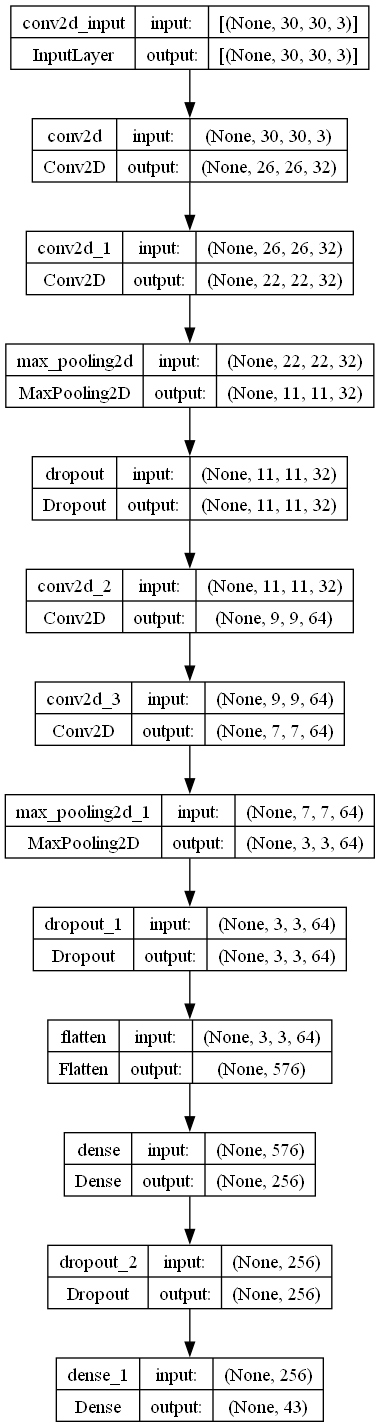

In [9]:
# Plotting the model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True
)

In [10]:
# Compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorize
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train and validate the model

In [11]:
# Training the model
# I tried with batch size 32 and 64. my model performed better with 64 batch size. And after 15 epochs the accuracy was stable
epochs = 15
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=64,
    validation_data=(X_test, y_test) 
)

Epoch 1/15
491/491 [==============================] - 44s 87ms/step - loss: 2.5058 - accuracy: 0.4061 - val_loss: 0.7289 - val_accuracy: 0.8355
Epoch 2/15
491/491 [==============================] - 47s 95ms/step - loss: 0.7970 - accuracy: 0.7679 - val_loss: 0.2468 - val_accuracy: 0.9430
Epoch 3/15
491/491 [==============================] - 49s 100ms/step - loss: 0.4805 - accuracy: 0.8578 - val_loss: 0.1622 - val_accuracy: 0.9532
Epoch 4/15
491/491 [==============================] - 51s 104ms/step - loss: 0.3444 - accuracy: 0.8984 - val_loss: 0.0968 - val_accuracy: 0.9749
Epoch 5/15
491/491 [==============================] - 47s 96ms/step - loss: 0.2754 - accuracy: 0.9217 - val_loss: 0.0876 - val_accuracy: 0.9760
Epoch 6/15
491/491 [==============================] - 45s 92ms/step - loss: 0.2381 - accuracy: 0.9300 - val_loss: 0.0801 - val_accuracy: 0.9806
Epoch 7/15
491/491 [==============================] - 45s 92ms/step - loss: 0.2161 - accuracy: 0.9367 - val_loss: 0.0749 - val_accurac

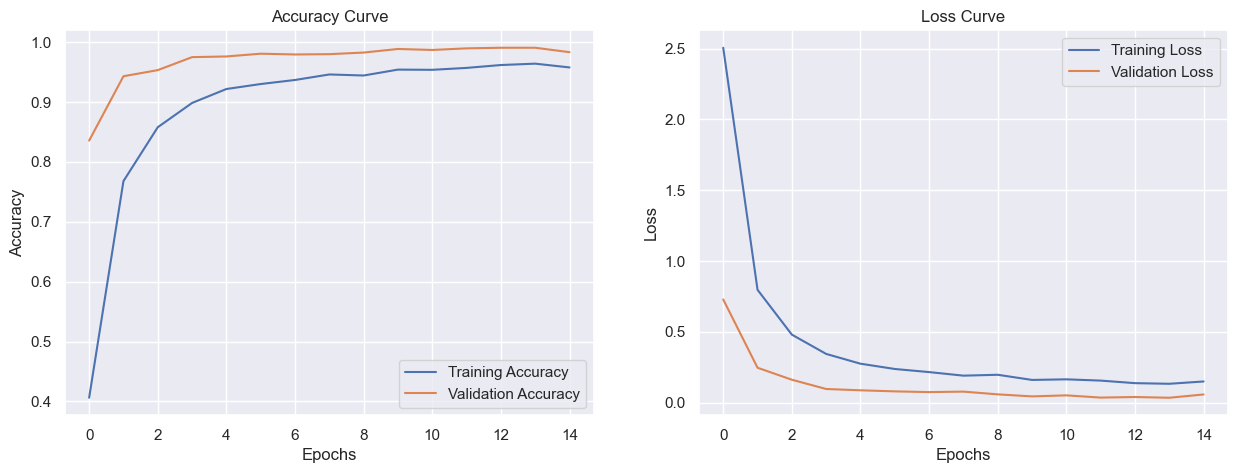

In [12]:
# Plot the graph for accuracy
sns.set()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label="Training Accuracy")
ax[0].plot(history.history['val_accuracy'], label="Validation Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy Curve")
ax[0].legend()
# Plot the graph for loss
ax[1].plot(history.history['loss'], label="Training Loss")
ax[1].plot(history.history['val_loss'], label="Validation Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss Curve")
ax[1].legend()

# Test the model with test dataset

In [13]:
# test.csv file, have the details related to the image path and their respective class labels
test = pd.read_csv("Test.csv")
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [14]:
# Extract the image labels
# Convert the labels into one-hot encoding
y_test = test["ClassId"].values
y_test = to_categorical(y_test, 43)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
# Extract the image path
imgs = test["Path"].values

data= []

for img in imgs:
    # Preprocess the input image, resize the image
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

In [16]:
# Achieved about 95% accuracy in this model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy: {accuracy * 100:.4}")

395/395 [==============================] - 4s 11ms/step - loss: 0.1802 - accuracy: 0.9500
Model accuracy: 95.0


In [17]:
# Saving the model
model.save("traffic_classifier.keras")

# Trying the model

In [18]:
# Dictionary to label all traffic signs class
classes = {1: 'Speed limit (20km/h)',
           2: 'Speed limit (30km/h)',
           3: 'Speed limit (50km/h)',
           4: 'Speed limit (60km/h)',
           5: 'Speed limit (70km/h)',
           6: 'Speed limit (80km/h)',
           7: 'End of speed limit (80km/h)',
           8: 'Speed limit (100km/h)',
           9: 'Speed limit (120km/h)',
           10: 'No passing',
           11: 'No passing veh over 3.5 tons',
           12: 'Right-of-way at intersection',
           13: 'Priority road',
           14: 'Yield',
           15: 'Stop',
           16: 'No vehicles',
           17: 'Veh > 3.5 tons prohibited',
           18: 'No entry',
           19: 'General caution',
           20: 'Dangerous curve left',
           21: 'Dangerous curve right',
           22: 'Double curve',
           23: 'Bumpy road',
           24: 'Slippery road',
           25: 'Road narrows on the right',
           26: 'Road work',
           27: 'Traffic signals',
           28: 'Pedestrians',
           29: 'Children crossing',
           30: 'Bicycles crossing',
           31: 'Beware of ice/snow',
           32: 'Wild animals crossing',
           33: 'End speed + passing limits',
           34: 'Turn right ahead',
           35: 'Turn left ahead',
           36: 'Ahead only',
           37: 'Go straight or right',
           38: 'Go straight or left',
           39: 'Keep right',
           40: 'Keep left',
           41: 'Roundabout mandatory',
           42: 'End of no passing',
           43: 'End no passing veh > 3.5 tons'}

In [19]:
def traffic_sign_classifier(path):
    image = Image.open(path)
    
    # Plot the traffic sign
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    # Preprocess the input image, resize the image
    image = image.resize((30, 30))
    # Add an extra dimension to the array
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    
    # Predict the sign name
    prediction = classes[np.argmax(model.predict([image])) + 1]
    print(f"Traffic sign name: {prediction}")

# Trying the model

1/1 [==============================] - 0s 150ms/step
Traffic sign name: Speed limit (50km/h)


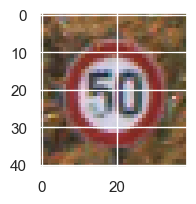

In [20]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\00756.png")

1/1 [==============================] - 0s 24ms/step
Traffic sign name: Children crossing


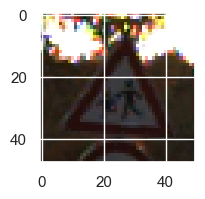

In [21]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\00773.png")

1/1 [==============================] - 0s 22ms/step
Traffic sign name: Turn right ahead


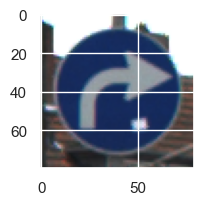

In [22]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\01057.png")

1/1 [==============================] - 0s 21ms/step
Traffic sign name: No entry


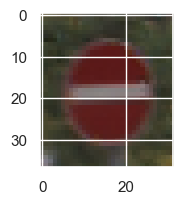

In [23]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\01253.png")

1/1 [==============================] - 0s 21ms/step
Traffic sign name: Road work


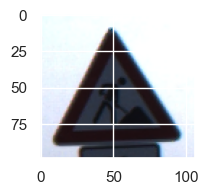

In [24]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\02021.png")

1/1 [==============================] - 0s 21ms/step
Traffic sign name: Right-of-way at intersection


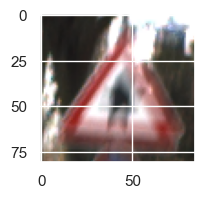

In [25]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\01994.png")

1/1 [==============================] - 0s 20ms/step
Traffic sign name: Right-of-way at intersection


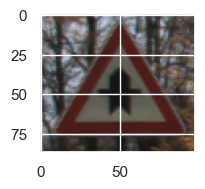

In [26]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\01944.png")

1/1 [==============================] - 0s 20ms/step
Traffic sign name: General caution


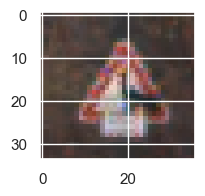

In [27]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\03960.png")

1/1 [==============================] - 0s 19ms/step
Traffic sign name: No entry


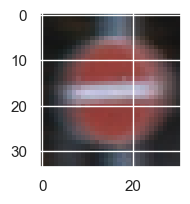

In [28]:
traffic_sign_classifier(r"A:\AMRO\1programming\DS, ML, DL, statistics\projects\Traffic Signs Recognition\Test\01432.png")